<a href="https://colab.research.google.com/github/pankaj-beldar/Bearing-Stability-detection/blob/main/Bearing_capillary_Clusteringipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Capillary roughness**

In [ ]:

# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from pandas import set_option
plt.style.use('ggplot') # nice plots
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


In [ ]:

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [ ]:

# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df= pd.read_excel("/content/drive/MyDrive/Bearing/capillary_roughness - Cluster.xlsx")

In [ ]:
df

,a,b,del,w,Mj,x,y
0,0.0500,0.0500,0.8,2,1.1Mc,0,0
1,0.0393,0.0498,0.8,2,1.1Mc,0,0
2,0.0185,0.0479,0.8,2,1.1Mc,0,0
3,-0.0065,0.0441,0.8,2,1.1Mc,0,0
4,-0.0291,0.0337,0.8,2,1.1Mc,0,0
...,...,...,...,...,...,...,...
1195,0.0279,-0.0180,1.2,3,1.1Mc,1,1
1196,0.0302,0.0030,1.2,3,1.1Mc,1,1
1197,0.0224,0.0212,1.2,3,1.1Mc,1,1
1198,0.0040,0.0333,1.2,3,1.1Mc,1,1


In [ ]:
X_transformed = pd.get_dummies(df, columns = ['Mj'])
X_transformed

,a,b,del,w,x,y,Mj_0.9Mc,Mj_1.1Mc
0,0.0500,0.0500,0.8,2,0,0,0,1
1,0.0393,0.0498,0.8,2,0,0,0,1
2,0.0185,0.0479,0.8,2,0,0,0,1
3,-0.0065,0.0441,0.8,2,0,0,0,1
4,-0.0291,0.0337,0.8,2,0,0,0,1
...,...,...,...,...,...,...,...,...
1195,0.0279,-0.0180,1.2,3,1,1,0,1
1196,0.0302,0.0030,1.2,3,1,1,0,1
1197,0.0224,0.0212,1.2,3,1,1,0,1
1198,0.0040,0.0333,1.2,3,1,1,0,1


For n_clusters = 2 The average silhouette_score is : 0.8434592473873785
For n_clusters = 3 The average silhouette_score is : 0.8053823748425567
For n_clusters = 4 The average silhouette_score is : 0.637237966747154
For n_clusters = 5 The average silhouette_score is : 0.6742845509045635
For n_clusters = 6 The average silhouette_score is : 0.6293540827706114
For n_clusters = 7 The average silhouette_score is : 0.5473507366235955
For n_clusters = 8 The average silhouette_score is : 0.6077358347449664
For n_clusters = 9 The average silhouette_score is : 0.632410709362184
For n_clusters = 10 The average silhouette_score is : 0.6507086323486103


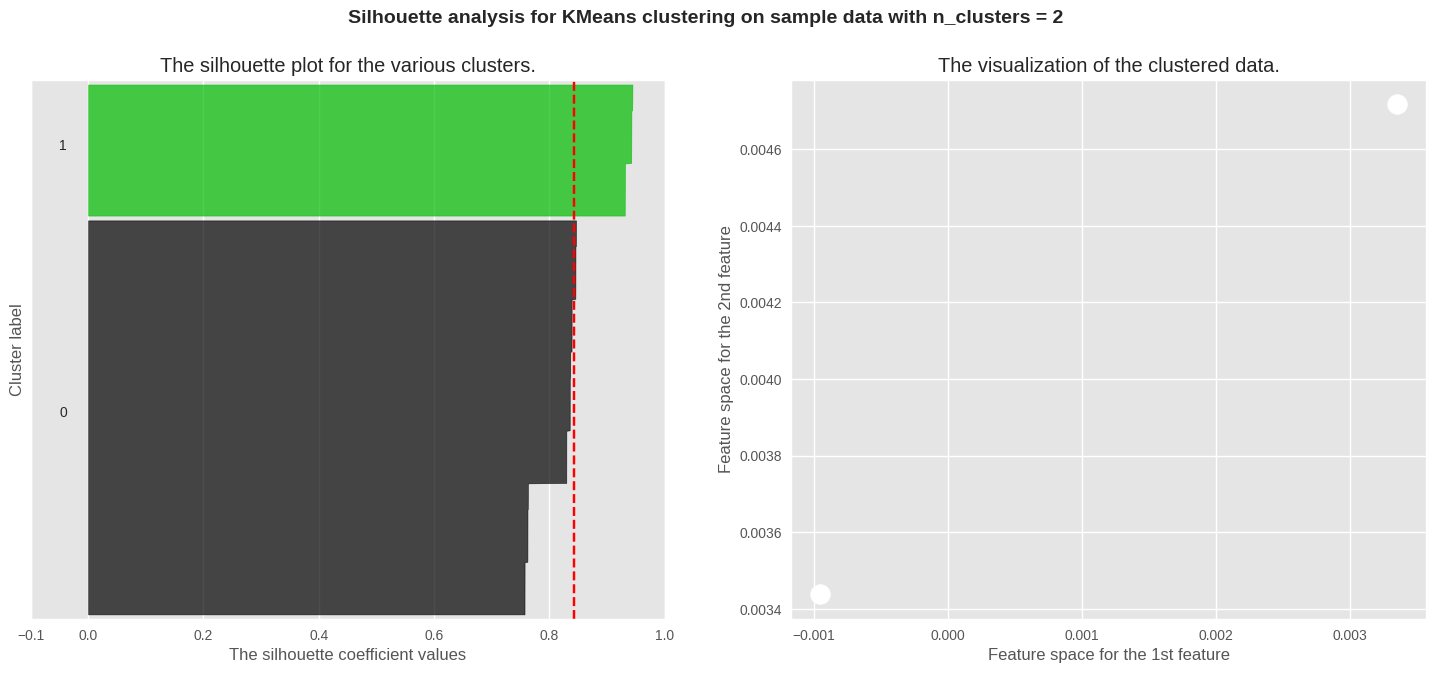

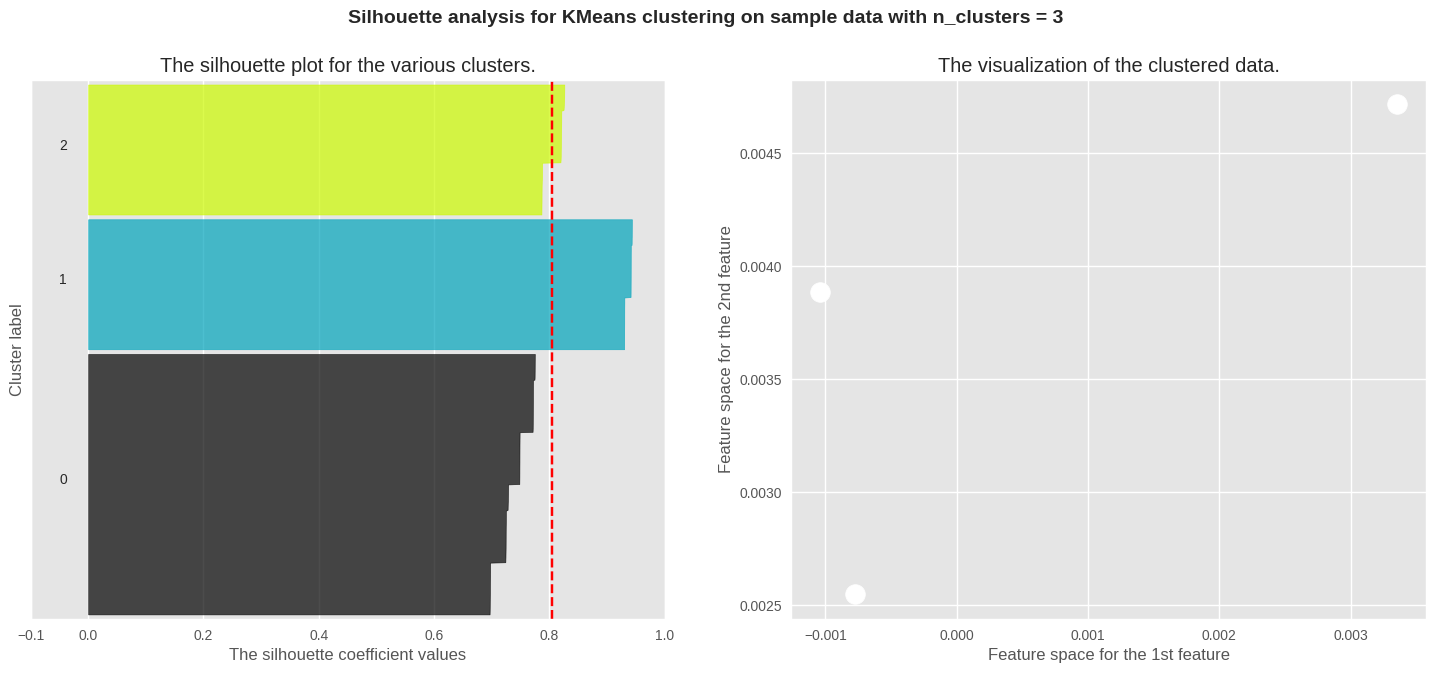

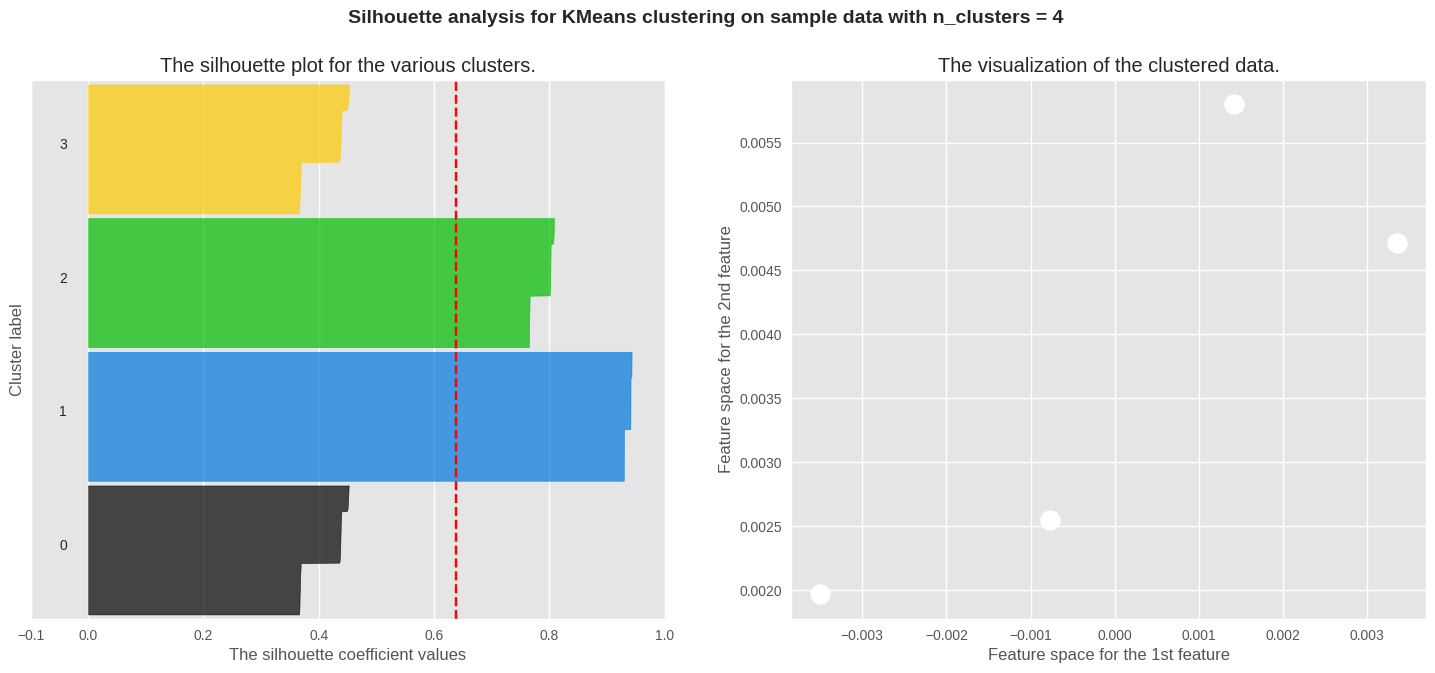

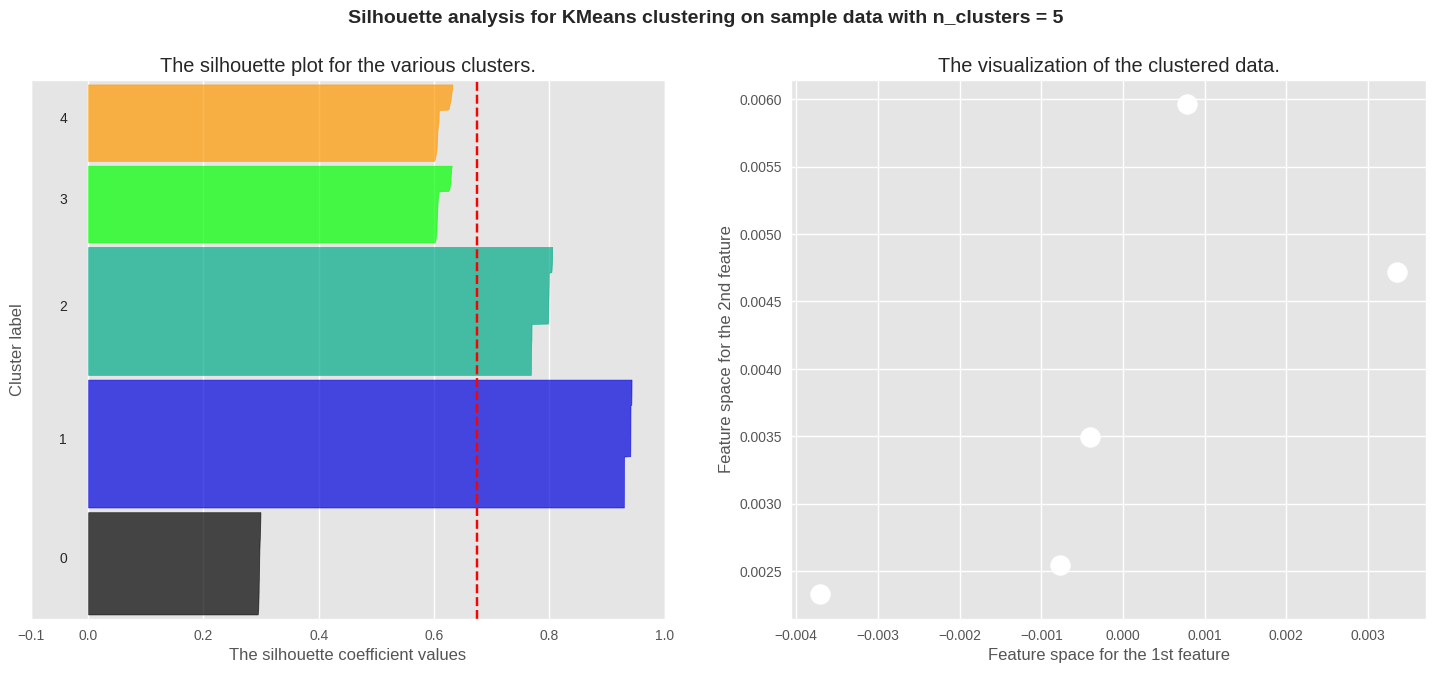

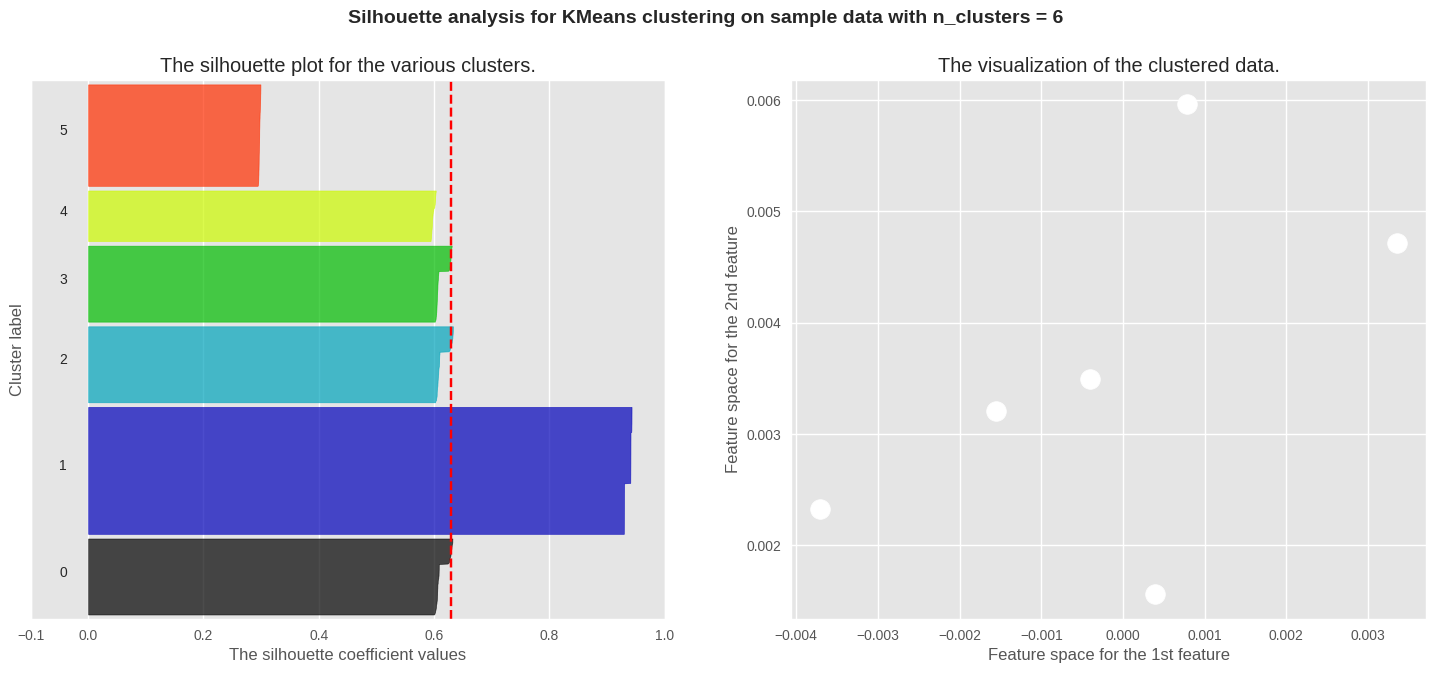

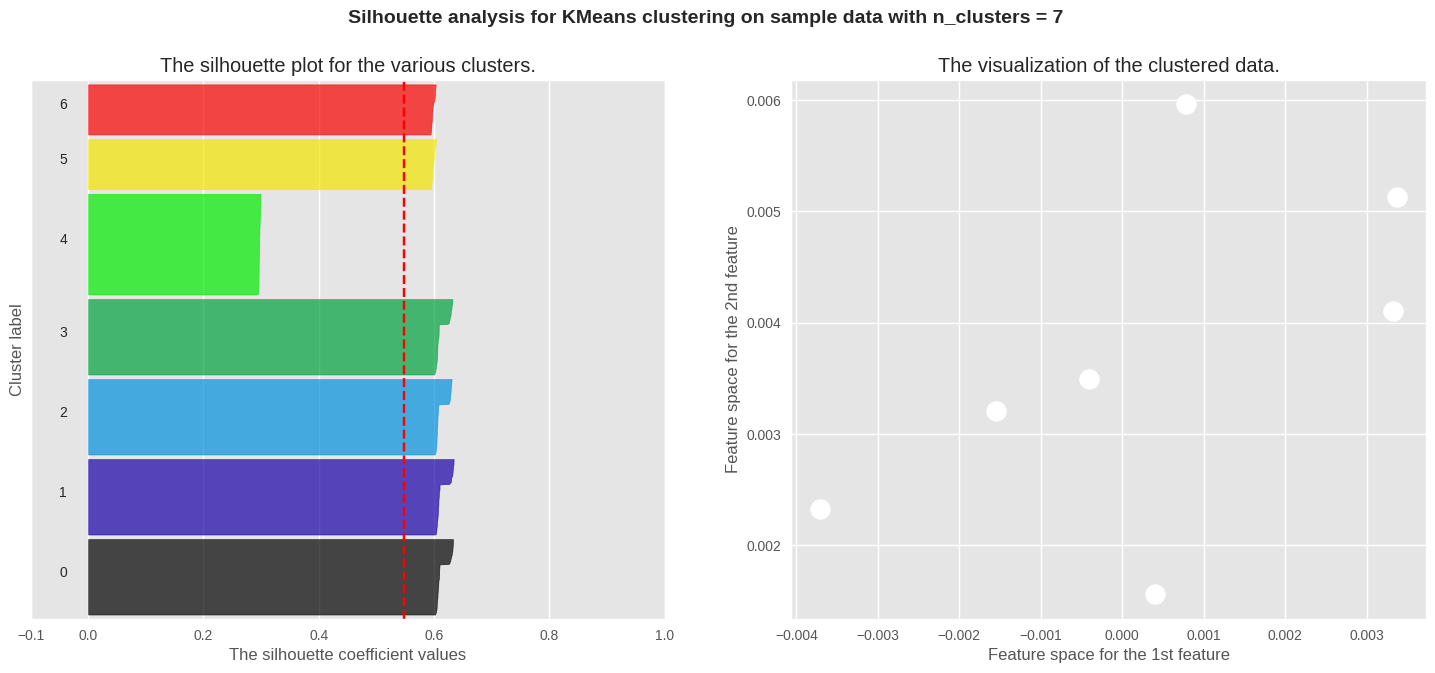

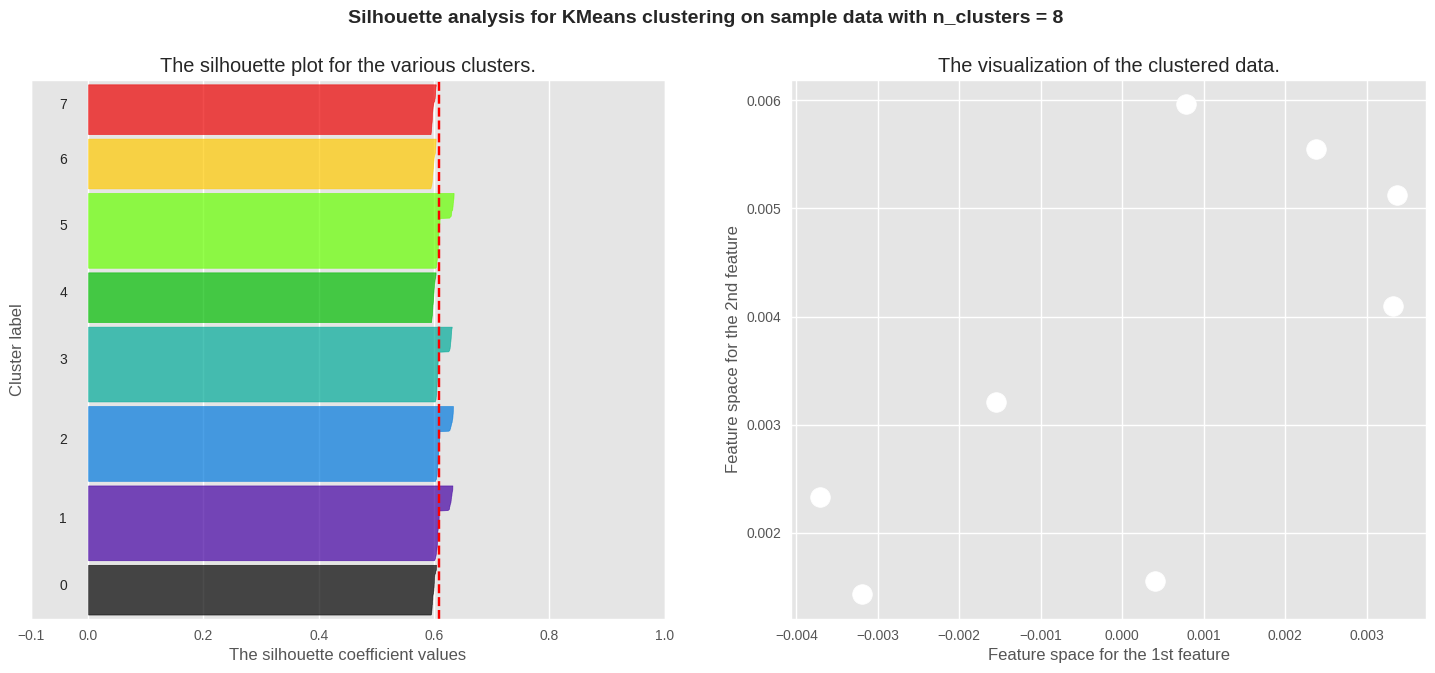

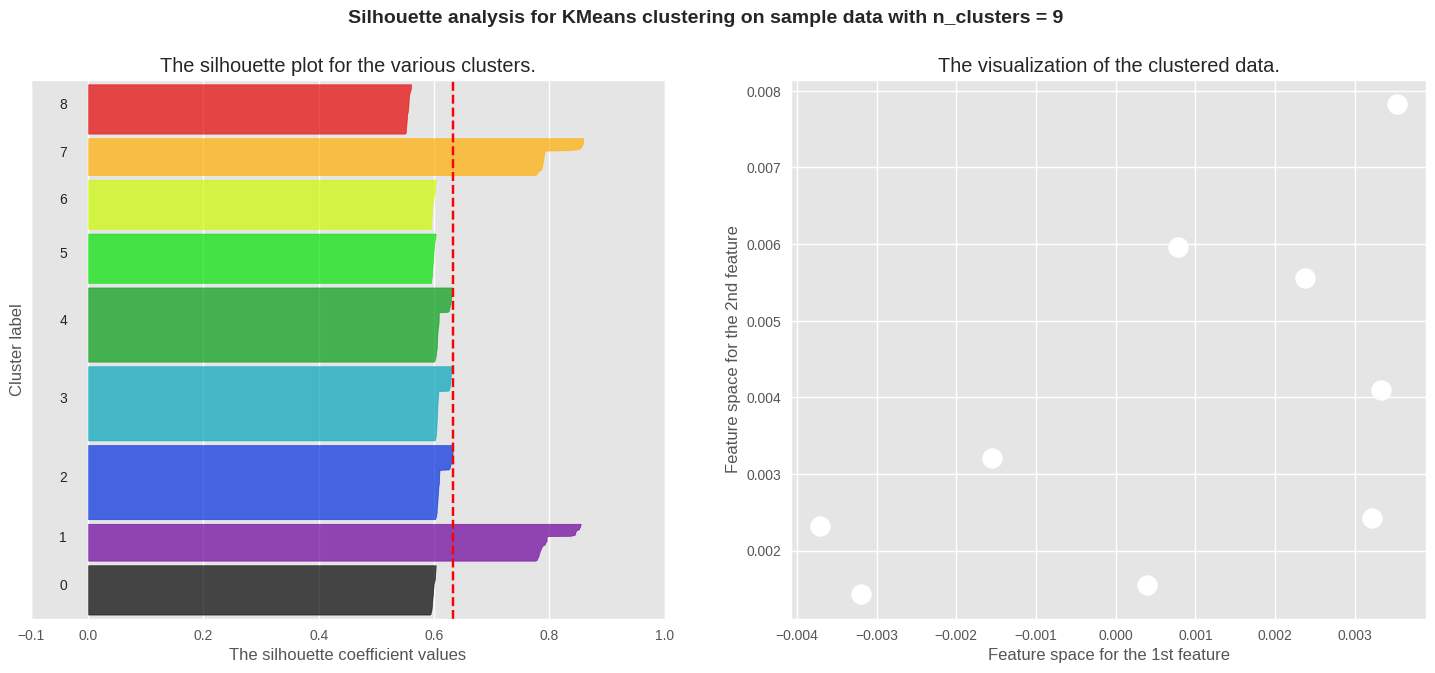

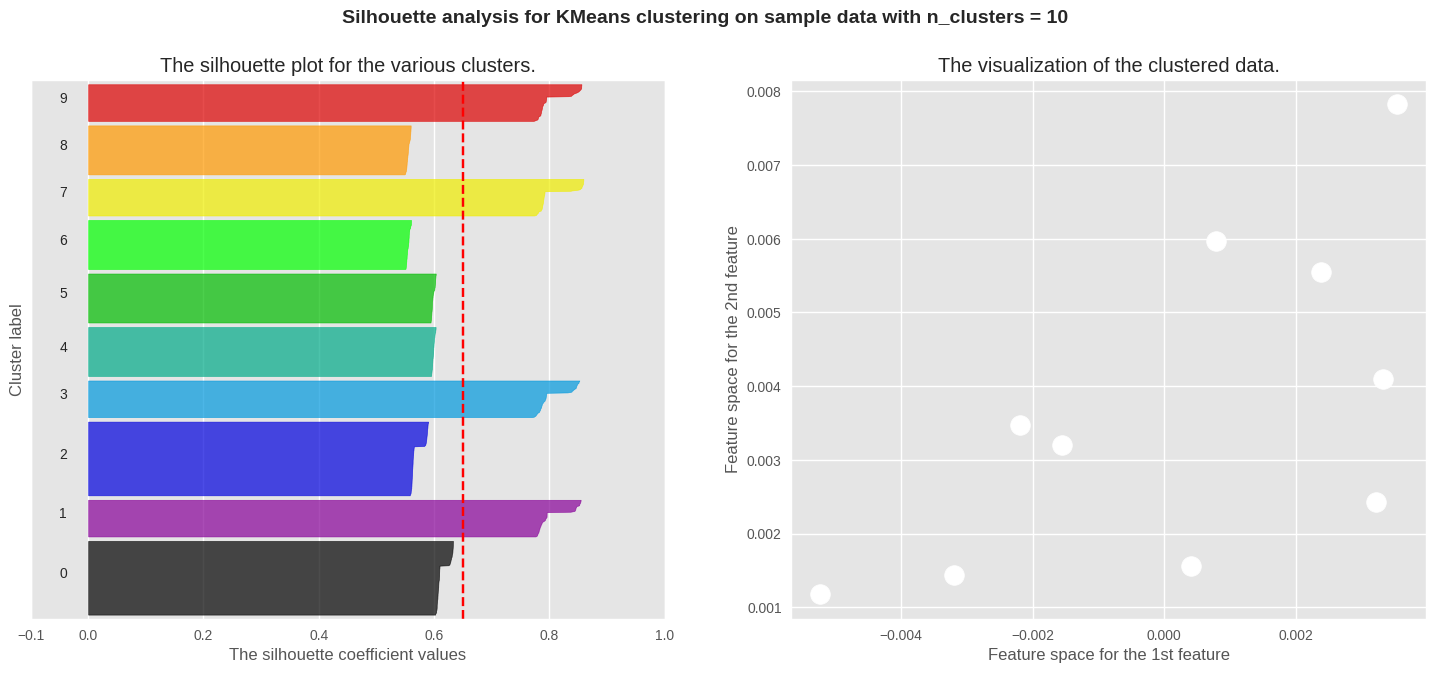

In [ ]:
range_n_clusters = [i for i in range(2,11)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_transformed) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_transformed)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_transformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_transformed, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
     # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    #ax2.scatter(X_transformed[:, 0], X_transformed[:, 1])



    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, )

    #for i, c in enumerate(centers):
    # ax2.scatter(c[0], c[1], marker='' % i, alpha=1,s=50, )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

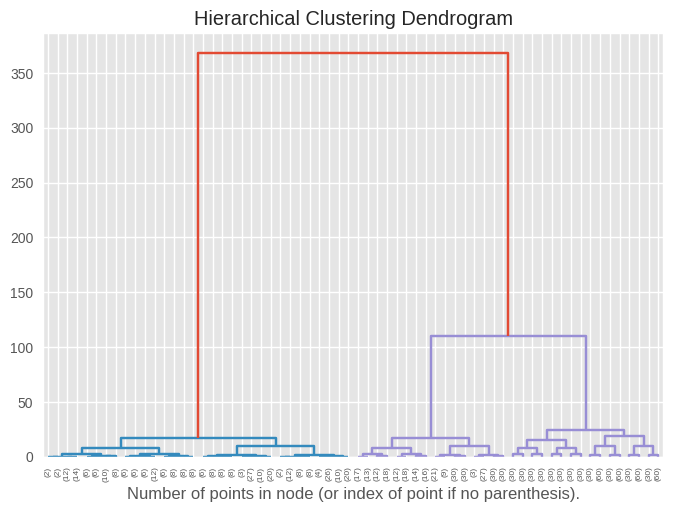

In [ ]:


X=X_transformed

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)





# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(y= 7000, color='black', linestyle='--')
plt.show()

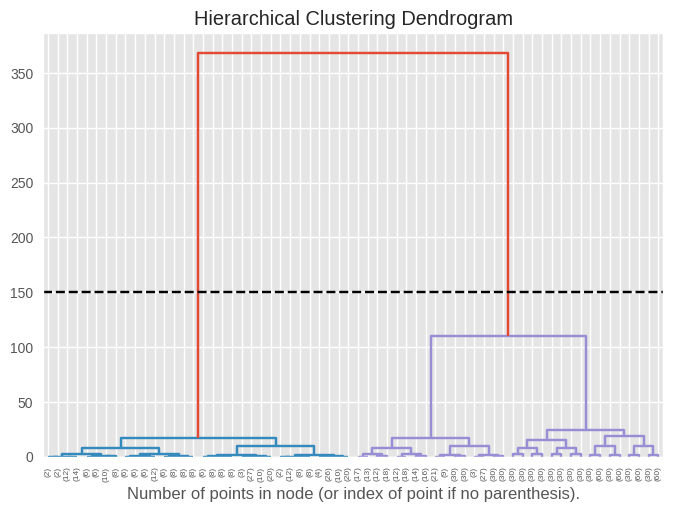

In [ ]:
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(y= 150, color='black', linestyle='--')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming your data is stored in X

# Create a list to store silhouette scores
silhouette_scores = []

# Calculate silhouette scores for cluster numbers from 2 to 10
for num_clusters in range(2, 11):
    agg_cluster = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = agg_cluster.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {num_clusters} clusters: {silhouette_avg}")

# Find the optimal number of clusters with the highest silhouette score
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 to get the cluster number (index starts from 0)

print(f"Optimal Number of Clusters: {optimal_num_clusters}")


Silhouette Score for 2 clusters: 0.8434592473873785
Silhouette Score for 3 clusters: 0.8053823748425567
Silhouette Score for 4 clusters: 0.6374316098845049
Silhouette Score for 5 clusters: 0.6742845509045635
Silhouette Score for 6 clusters: 0.6293540827706114
Silhouette Score for 7 clusters: 0.5473507366235955
Silhouette Score for 8 clusters: 0.6077358347449664
Silhouette Score for 9 clusters: 0.632410709362184
Silhouette Score for 10 clusters: 0.6507086323486103
Optimal Number of Clusters: 2


For n_clusters = 2 The average silhouette_score is : 0.8434592473873785
For n_clusters = 3 The average silhouette_score is : 0.8053823748425567
For n_clusters = 4 The average silhouette_score is : 0.637237966747154
For n_clusters = 5 The average silhouette_score is : 0.6742845509045635
For n_clusters = 6 The average silhouette_score is : 0.6293540827706114
For n_clusters = 7 The average silhouette_score is : 0.5473507366235955
For n_clusters = 8 The average silhouette_score is : 0.6077358347449664
For n_clusters = 9 The average silhouette_score is : 0.632410709362184
For n_clusters = 10 The average silhouette_score is : 0.6507086323486103


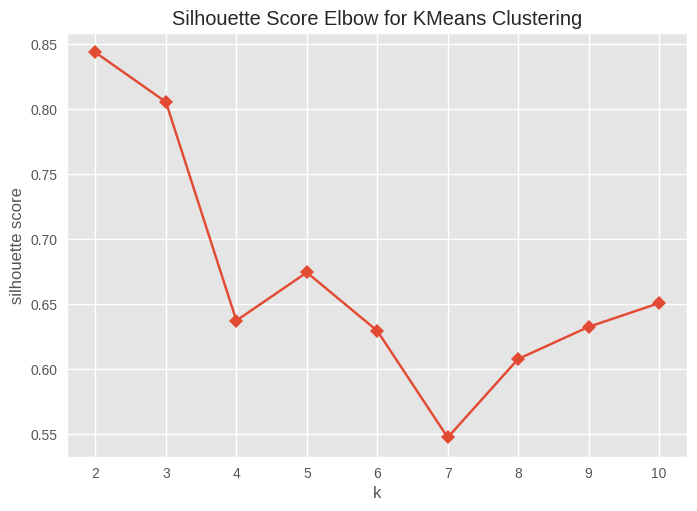

In [ ]:

range_n_clusters = [i for i in range(2,11)]

for n_clusters in range_n_clusters:




    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_transformed)


    silhouette_avg = silhouette_score(X_transformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    #
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

plt.show()

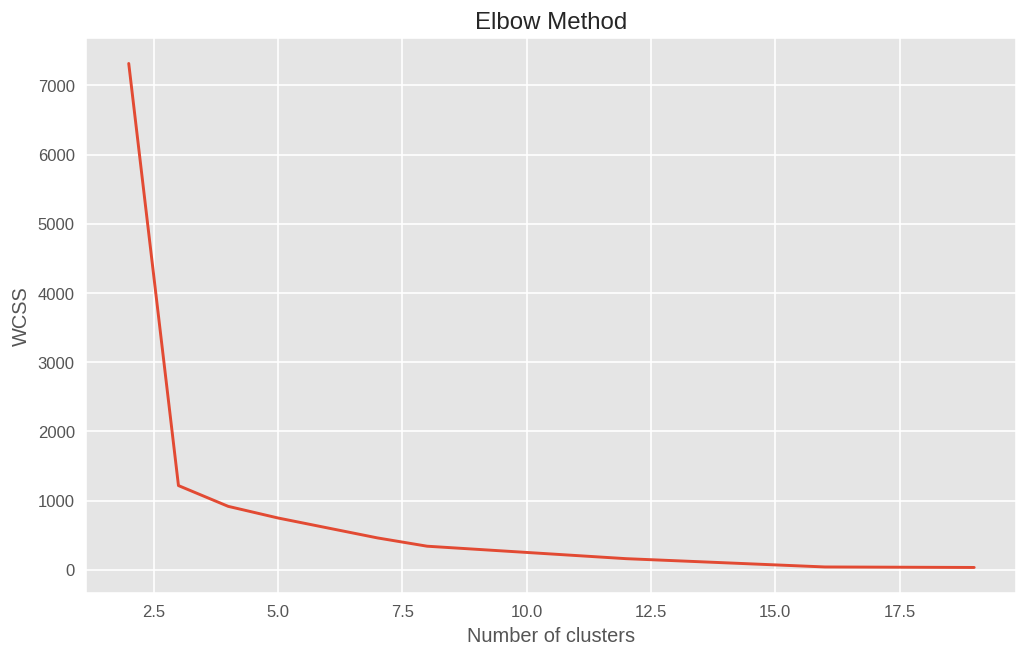

In [ ]:

plt.figure(figsize=(10,6), dpi=120)
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters=2)
cluster_labels = agg_cluster.fit_predict(X_transformed)


# Add cluster labels to the original DataFrame
df['Cluster_Labels'] = cluster_labels
# Group data by cluster labels
grouped_data = df.groupby('Cluster_Labels')

# Iterate through each cluster and access the data
for cluster_label, cluster_data in grouped_data:
    print(f'Cluster {cluster_label}:')
    print(cluster_data)


Cluster 0:
           a       b  del  w     Mj  x  y  Cluster_Labels
0     0.0500  0.0500  0.8  2  1.1Mc  0  0               0
1     0.0393  0.0498  0.8  2  1.1Mc  0  0               0
2     0.0185  0.0479  0.8  2  1.1Mc  0  0               0
3    -0.0065  0.0441  0.8  2  1.1Mc  0  0               0
4    -0.0291  0.0337  0.8  2  1.1Mc  0  0               0
...      ...     ...  ... ..    ... .. ..             ...
1195  0.0279 -0.0180  1.2  3  1.1Mc  1  1               0
1196  0.0302  0.0030  1.2  3  1.1Mc  1  1               0
1197  0.0224  0.0212  1.2  3  1.1Mc  1  1               0
1198  0.0040  0.0333  1.2  3  1.1Mc  1  1               0
1199 -0.0181  0.0352  1.2  3  1.1Mc  1  1               0

[900 rows x 8 columns]
Cluster 1:
           a       b  del  w     Mj   x  y  Cluster_Labels
120   0.0500  0.0500  0.8  2  1.1Mc  18  3               1
121   0.0380  0.0508  0.8  2  1.1Mc  18  3               1
122   0.0154  0.0499  0.8  2  1.1Mc  18  3               1
123  -0.0070  0.0450  

In [ ]:
for cluster_label, cluster_data in grouped_data:
    # Export cluster data to Excel
    cluster_data.to_excel(f'cluster_{cluster_label}_data.xlsx', index=False)
    # Alternatively, export to CSV
    # cluster_data.to_csv(f'cluster_{cluster_label}_data.csv', index=False)

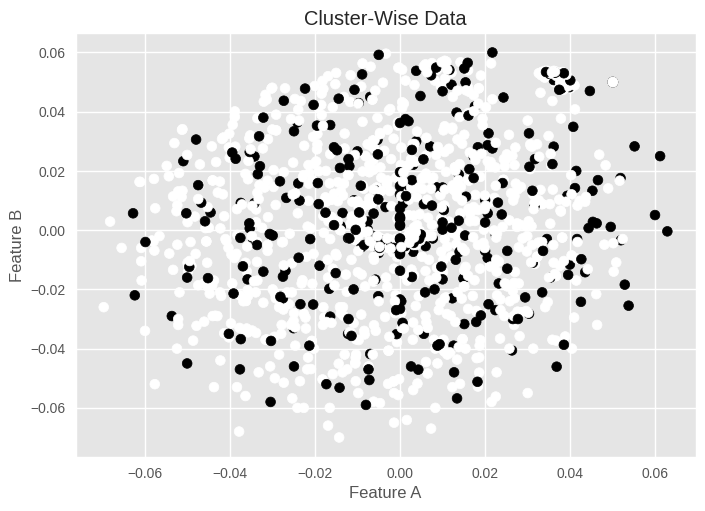

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data
data = pd.read_excel('/content/cluster_0_data.xlsx')

# Separate the features and the target
X = data[['a', 'b', 'del', 'w', 'Mj', 'x', 'y']]
y = data['Cluster_Labels']
X=pd.get_dummies(df, columns = ['Mj'])
# Perform K-Means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Predict the cluster labels
cluster_labels = kmeans.predict(X)

# Plot the data
plt.scatter(X['a'], X['b'], c=cluster_labels)
plt.title('Cluster-Wise Data')
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.8434592473873785
For n_clusters = 3 The average silhouette_score is : 0.8053823748425567
For n_clusters = 4 The average silhouette_score is : 0.6374316098845049
For n_clusters = 5 The average silhouette_score is : 0.6742845509045635
For n_clusters = 6 The average silhouette_score is : 0.6293540827706114
For n_clusters = 7 The average silhouette_score is : 0.5473507366235955
For n_clusters = 8 The average silhouette_score is : 0.6077358347449664
For n_clusters = 9 The average silhouette_score is : 0.632410709362184
For n_clusters = 10 The average silhouette_score is : 0.6507086323486103


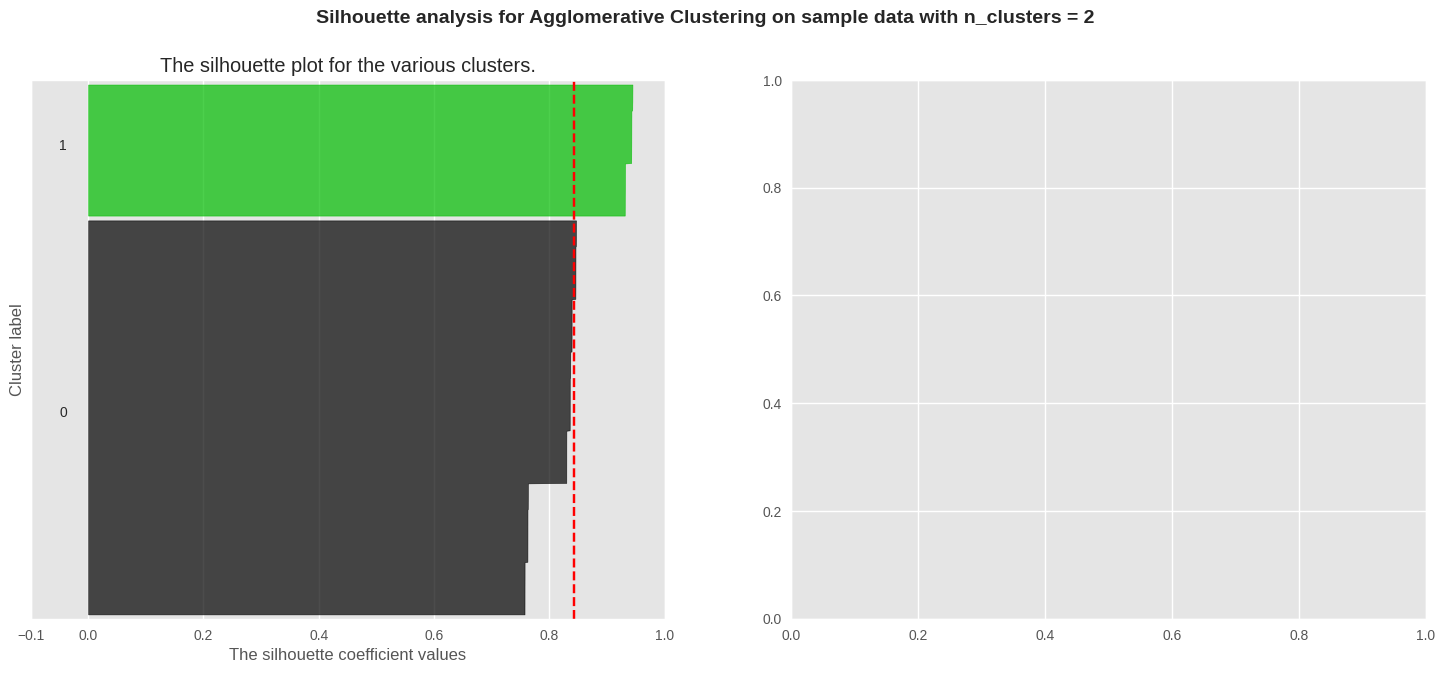

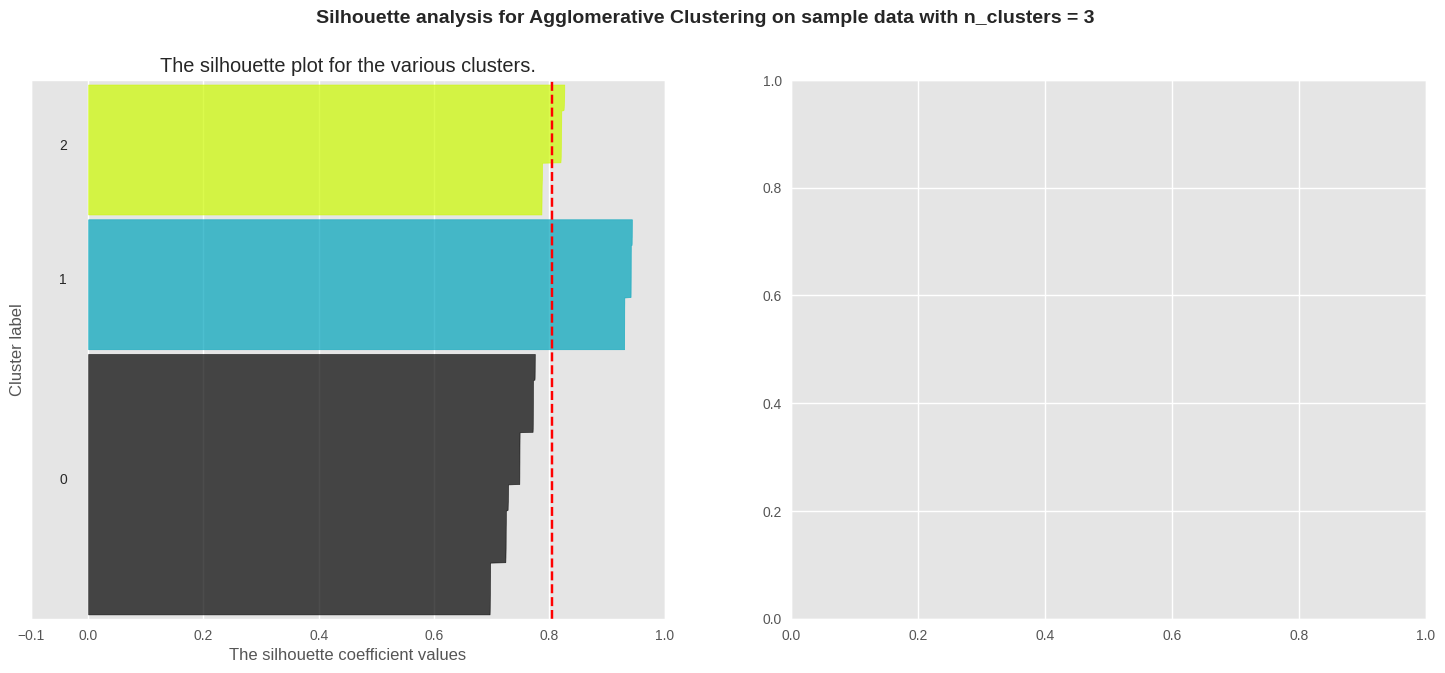

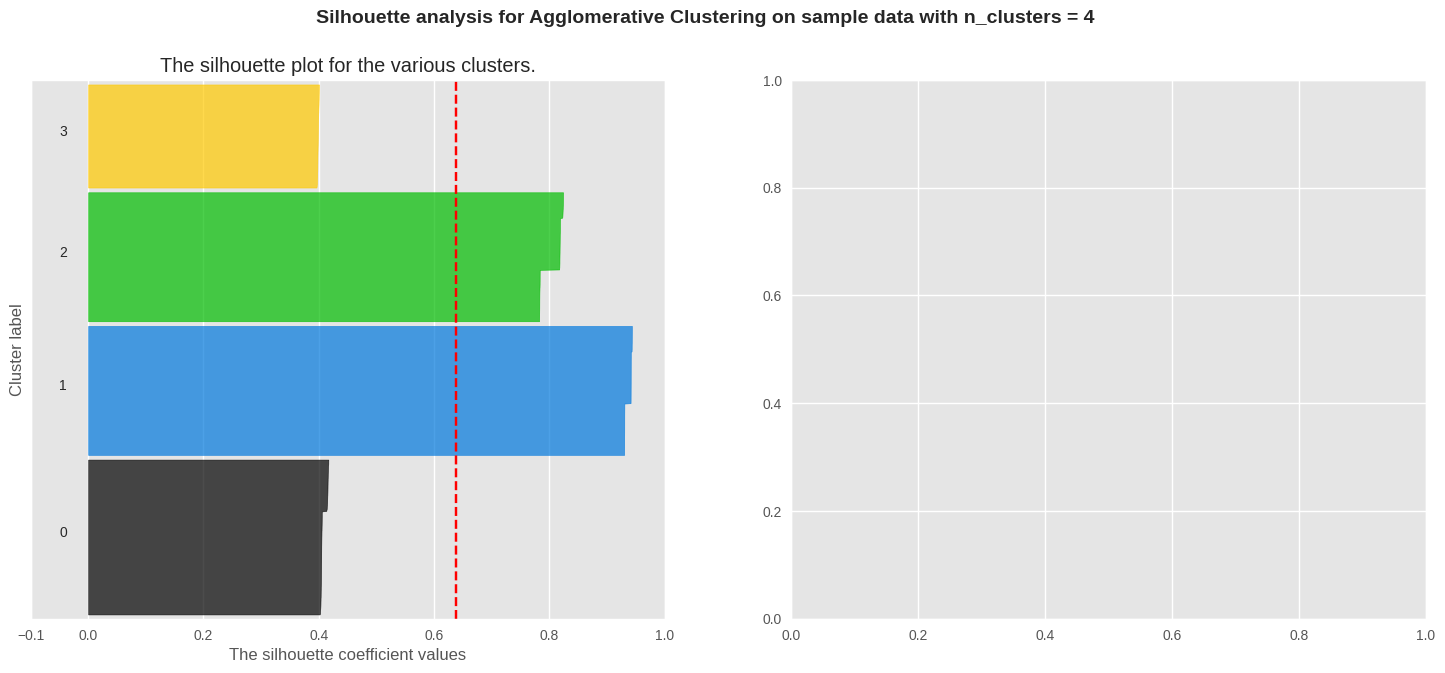

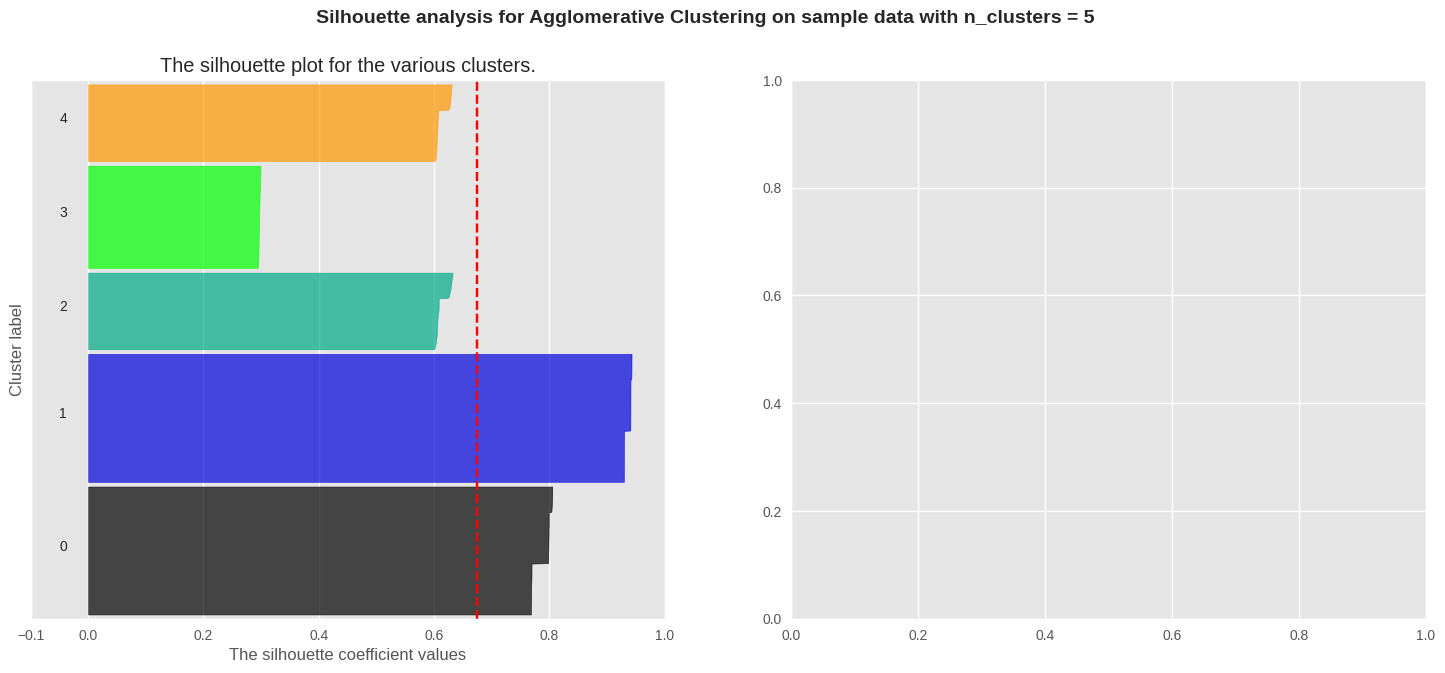

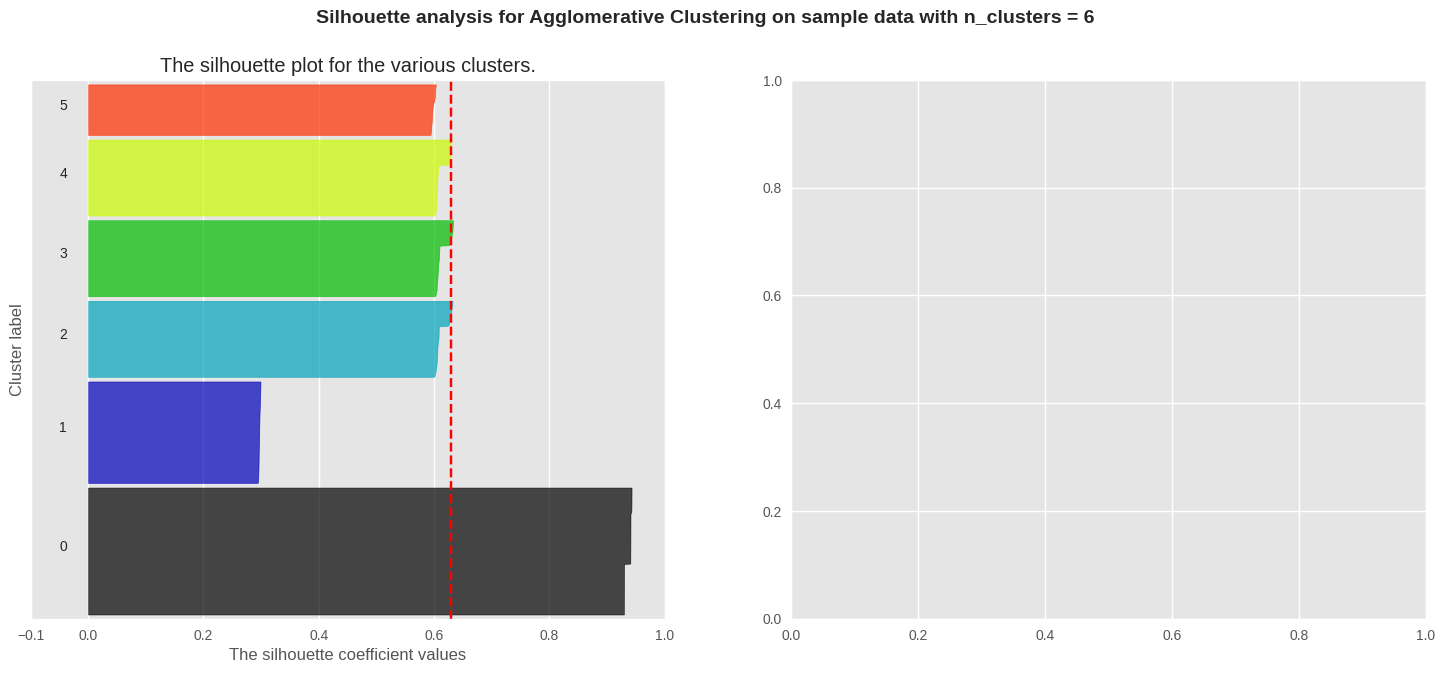

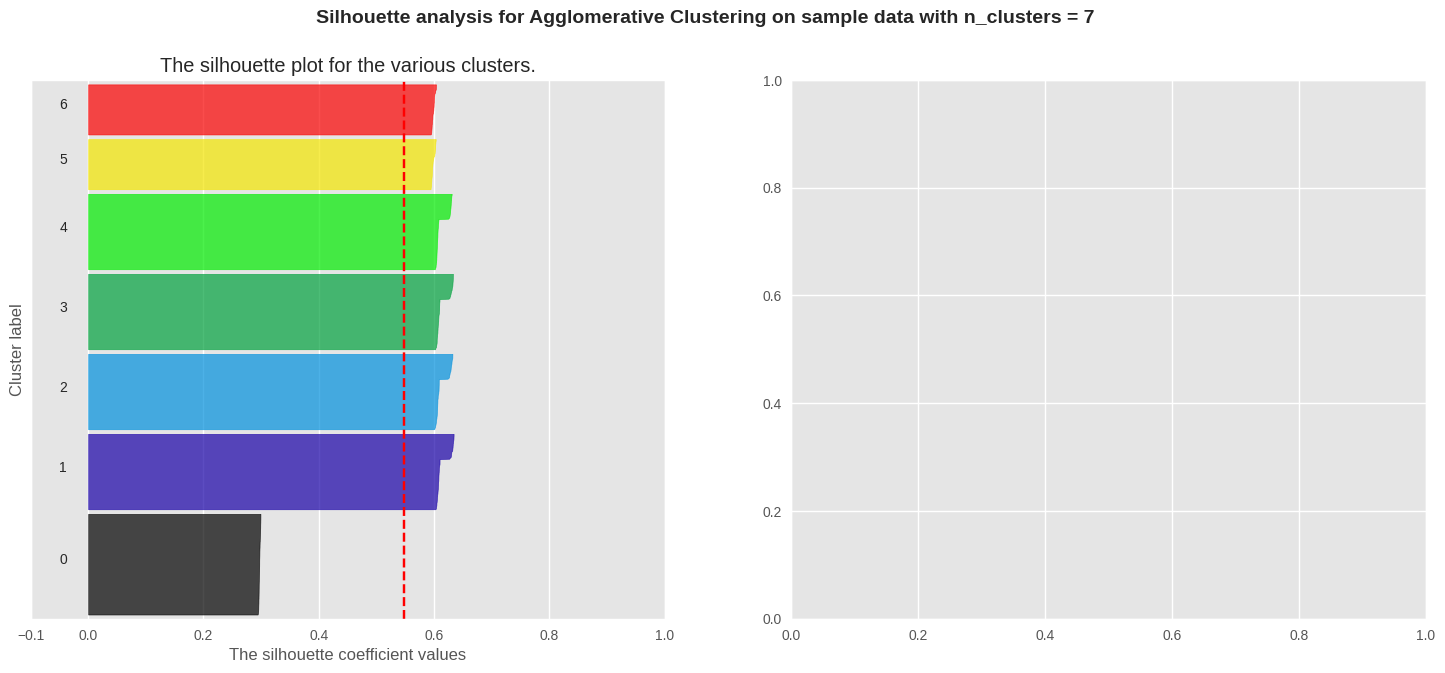

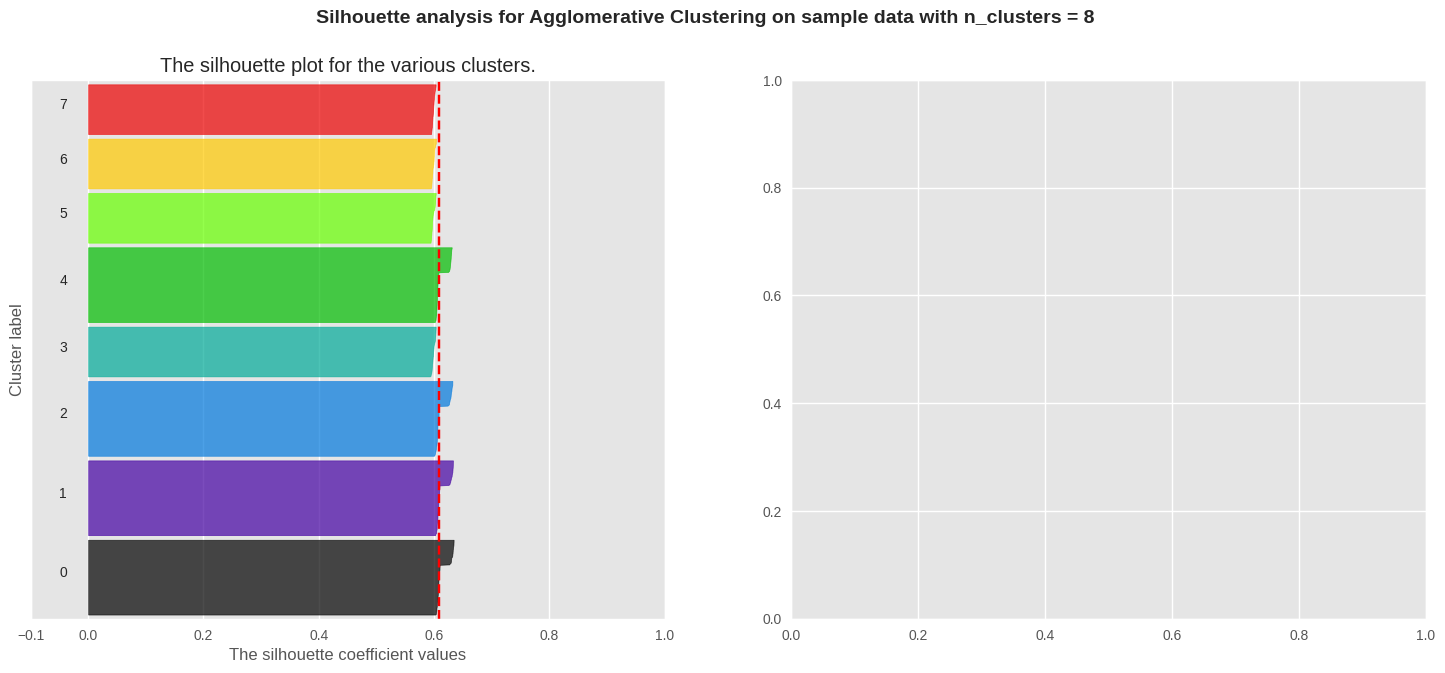

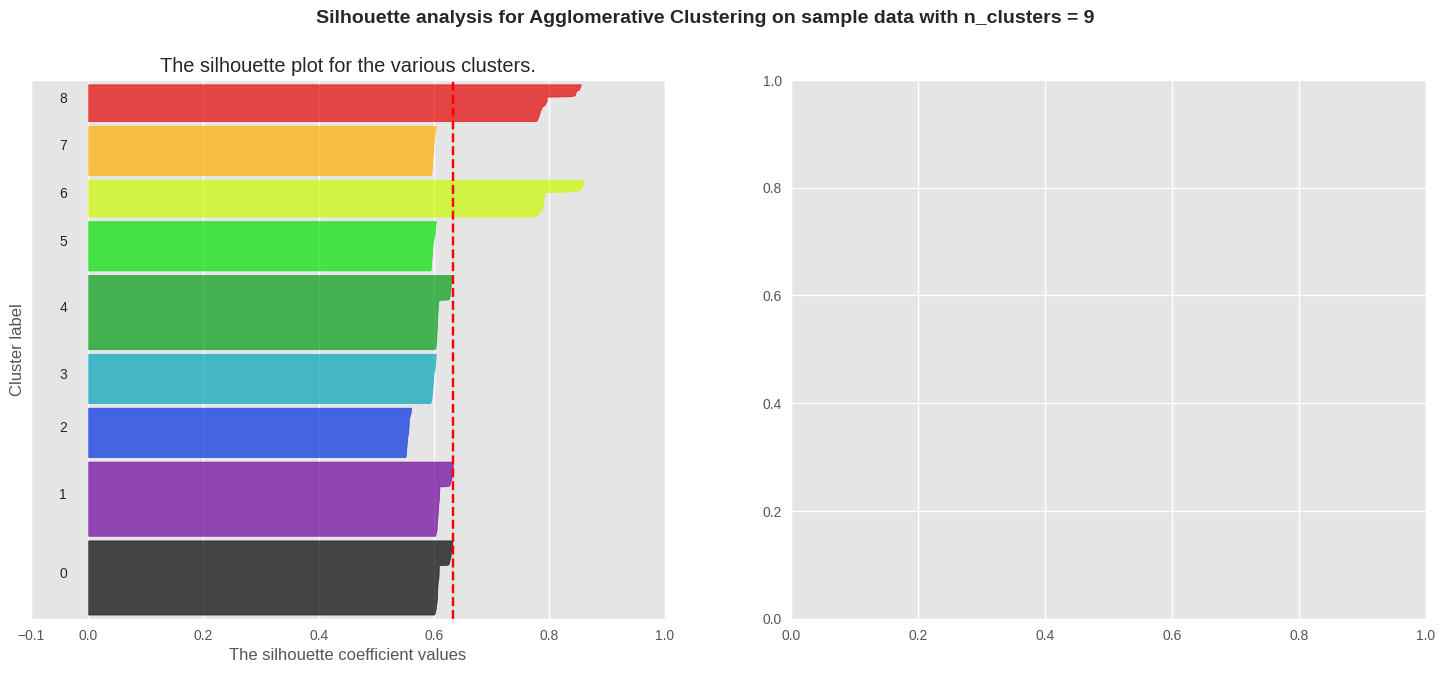

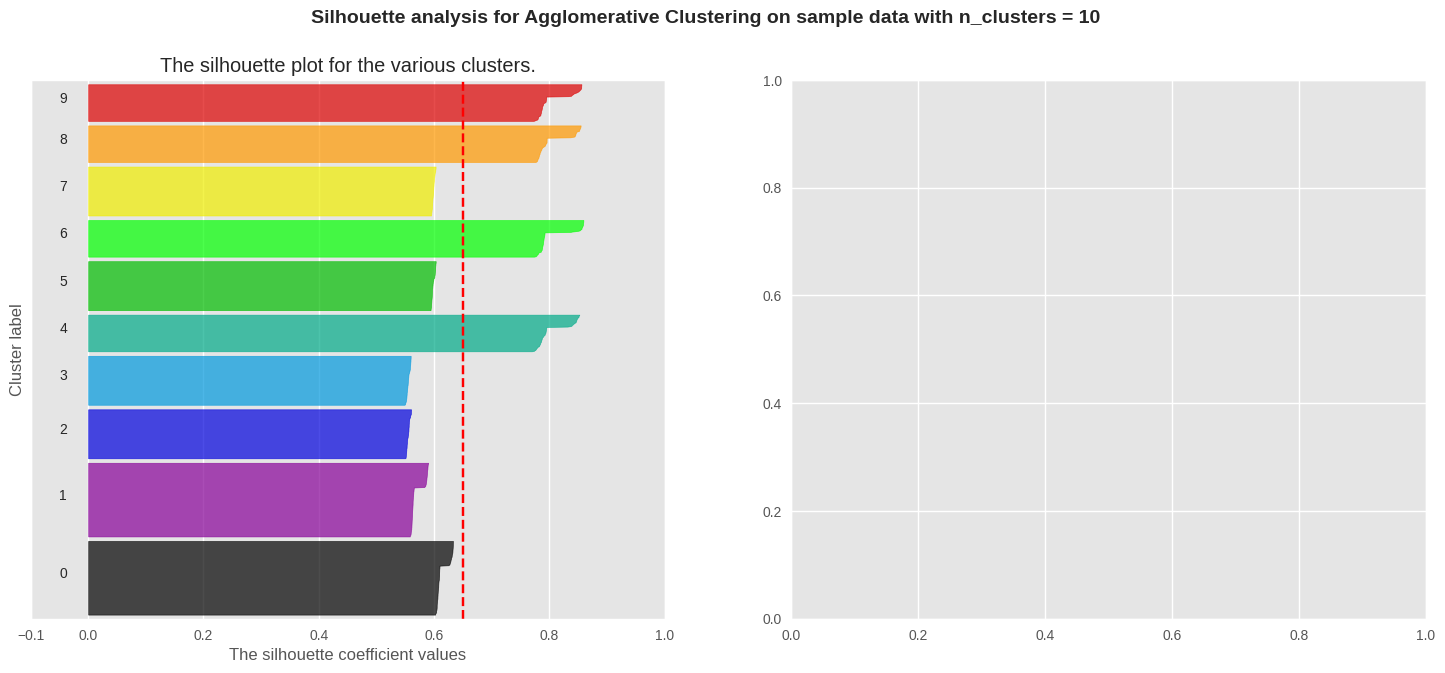

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.cm as cm

# Assuming your data is stored in X_transformed
# If you don't have X_transformed, replace it with your actual data

# Scale your data (if needed)
# scaler = StandardScaler()
# X_transformed = scaler.fit_transform(X_transformed)

range_n_clusters = [i for i in range(2, 11)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_transformed) + (n_clusters + 1) * 10])

    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_transformed)

    silhouette_avg = silhouette_score(X_transformed, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X_transformed, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    plt.suptitle(("Silhouette analysis for Agglomerative Clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
